# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plot
import requests
import io

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [4]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

### Step 3. Assign it to a variable called chipo.

In [5]:
chipo=pd.read_csv(url,sep ='\t')
#shift tap

### Step 4. See the first 10 entries

In [6]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [7]:
# Solution 1
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [8]:
# Solution 2
chipo.shape[0]

4622

### Step 6. What is the number of columns in the dataset?

In [9]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.

In [10]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [11]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [12]:
chipo['item_name'].value_counts

<bound method IndexOpsMixin.value_counts of 0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object>

### Step 9. Which was the most-ordered item? 

In [14]:
item=chipo.groupby('item_name').agg({'quantity':sum}) 
item2=item.sort_values('quantity',ascending=False)[:10]


In [47]:
c=chipo.groupby('item_name')
c=c.sum()
c=c.sort_values(['quantity'],ascending=False)
c.reset_index(inplace=True)
c

,item_name,order_id,quantity
0,Chicken Bowl,713926,761
1,Chicken Burrito,497303,591
2,Chips and Guacamole,449959,506
3,Steak Burrito,328437,386
4,Canned Soft Drink,304753,351
5,Chips,208004,230
6,Steak Bowl,193752,221
7,Bottled Water,175944,211
8,Chips and Fresh Tomato Salsa,100419,130
9,Canned Soda,76396,126


<BarContainer object of 10 artists>

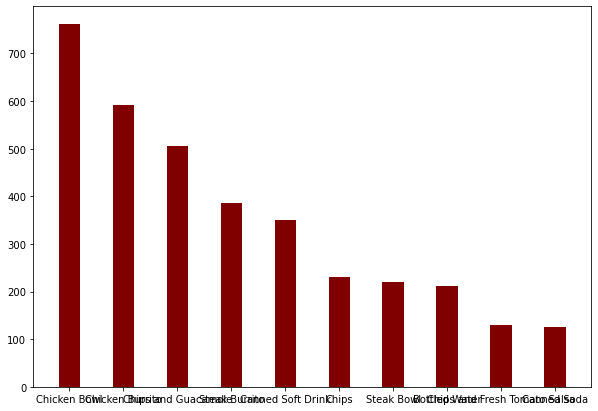

In [52]:
x = c['item_name'].head(10)
y = c['quantity'].head(10)
fig = plot.figure(figsize =(10, 7))
plot.bar(x, y, color ='maroon',width = 0.4)
 


### Step 10. For the most-ordered item, how many items were ordered?

In [53]:
#item.sort_values('quantity',ascending=False)[:1]
len(chipo.order_id[chipo.item_name=='Chicken Bowl'])

726

### Step 11. What was the most ordered item in the choice_description column?

In [54]:
item=chipo.groupby('choice_description').agg({'quantity':sum}) 
item.sort_values('quantity',ascending=False)[:3]

,quantity
choice_description,
[Diet Coke],159
[Coke],143
[Sprite],89


### Step 12. How many items were orderd in total?

In [55]:
chipo.quantity.sum()

4972

### Step 13. Turn the item price into a float

In [56]:
chipo['item_price']=chipo.item_price.str.slice(1).astype(float).head()

AttributeError: Can only use .str accessor with string values!

In [31]:
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617      NaN
4618      NaN
4619      NaN
4620      NaN
4621      NaN
Name: item_price, Length: 4622, dtype: float64

#### Step 13.a. Check the item price type

In [57]:
chipo.item_price.dtypes

dtype('float64')

#### Step 13.b. Create a lambda function and change the type of item price

In [58]:
chipo['item_price']=chipo.item_price.str.slice(1).apply(lambda x : float(x[1:]))

AttributeError: Can only use .str accessor with string values!

#### Step 13.c. Check the item price type

In [35]:
chipo.item_price.dtypes

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [44]:
chipo['item_price'].sum()

28.54

### Step 15. How many orders were made in the period?

In [63]:
chipo.order_id.value_counts().count()

1834

### Step 16. What is the average revenue amount per order?

In [41]:
# Solution 1
chipo['item_price'].sum()/chipo.shape[0]
chipo.groupby(by=['order_id']).mean()

0.006174816096927736

In [65]:
# Solution 2

chipo['item_price'].sum().mean()['revenue']


IndexError: invalid index to scalar variable.

### Step 17. How many different items are sold?

In [24]:
chipo.item_name.nunique()

50

In [64]:
chipo.item_name.value_counts().count()

50